In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [8]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/RB.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MACC","9MACC","6MACC","WINGACC","PIVOTACC","FASTBREAKACC"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalisasi nilai 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='RMSprop', loss=mean_squared_error)  
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
110/110 [==============================] - 0s 1ms/step - loss: 7.9944
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 6.7671
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 6.1579
Epoch 4/100
110/110 [==============================] - 0s 994us/step - loss: 5.8382
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 5.5746
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 5.3421
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 5.1534
Epoch 8/100
110/110 [==============================] - 0s 1ms/step - loss: 4.9861
Epoch 9/100
110/110 [==============================] - 0s 1ms/step - loss: 4.8330
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 4.7013
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 4.5837
Epoch 12/100
110/110 [==============================] - 0s 1ms/step - loss: 4.4712
Epoch 13/10

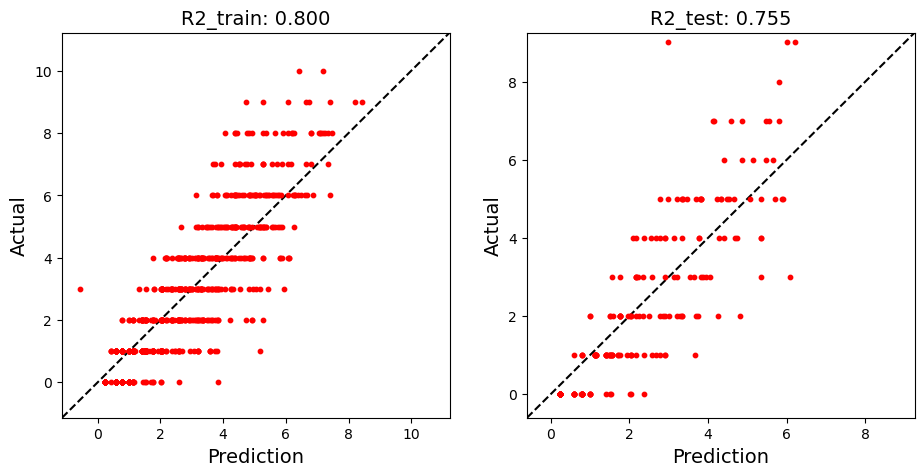

Mean Squared Error (MSE) 1.4304102813017792
Mean Absolute Error (MAE) 0.874375007911162


In [11]:
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred_test)
    print(f"Mean Squared Error (MSE)",mse)
    print(f"Mean Absolute Error (MAE)",mae)  
   


In [16]:
urlshot = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/SHOTATTEMPT.csv'
shot_df = pd.read_csv(urlshot, delimiter = ';')
# Normalisasi nilai 
scaler = MinMaxScaler()
shot_df = scaler.fit_transform(shot_df)
shot_sensitivity = model.predict(shot_df)
print(shot_sensitivity)

2/2 [==============================] - 0s 2ms/step
[[ 0.18639976]
 [ 0.7362849 ]
 [ 1.4381835 ]
 [ 2.2113724 ]
 [ 2.91824   ]
 [ 3.4003515 ]
 [ 3.535304  ]
 [ 3.2869992 ]
 [ 2.7212563 ]
 [ 0.18639976]
 [ 0.8521593 ]
 [ 1.6161551 ]
 [ 2.3340297 ]
 [ 2.9128056 ]
 [ 3.3218968 ]
 [ 3.5783777 ]
 [ 3.7220209 ]
 [ 3.7942157 ]
 [ 0.18639976]
 [ 0.7202596 ]
 [ 1.4235346 ]
 [ 2.2275233 ]
 [ 2.9998155 ]
 [ 3.5745516 ]
 [ 3.8089972 ]
 [ 3.6408525 ]
 [ 3.115025  ]
 [ 0.18639976]
 [ 0.39860708]
 [ 0.528354  ]
 [ 0.5420912 ]
 [ 0.43613178]
 [ 0.23825175]
 [-0.0040881 ]
 [-0.2421112 ]
 [-0.44104272]
 [ 0.18639976]
 [ 0.34445834]
 [ 0.52522033]
 [ 0.6989422 ]
 [ 0.82833236]
 [ 0.8812657 ]
 [ 0.8436768 ]
 [ 0.7256059 ]
 [ 0.5568612 ]
 [ 0.18639976]
 [ 0.34441406]
 [ 0.56292015]
 [ 0.8270408 ]
 [ 1.0993818 ]
 [ 1.3260357 ]
 [ 1.4531349 ]
 [ 1.4474937 ]
 [ 1.3106264 ]]


In [17]:
pd.DataFrame(shot_sensitivity).to_csv('sensitivitasshot.csv', index=False)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6)                 0         
                                                                 
 rbf_layer (RBFLayer)        (None, 6)                 36        
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
